## 一、相关库的引入
- seaborn：
  Seaborn是一种基于matplotlib的图形可视化python libraty。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。
- scipy：
  SciPy是一款方便、易于使用、专为科学和工程设计的Python工具包.它包括统计,优化,整合,线性代数模块,傅里叶变换,信号和图像处理,常微分方程求解器等等.
  

In [3]:
# 导入需要的模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 用来绘图的，封装了matplot
# 要注意的是一旦导入了seaborn，
# matplotlib的默认作图风格就会被覆盖成seaborn的格式
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
# 为了在jupyter notebook里作图，需要用到这个命令

## 二、获取和读取数据集

In [10]:
data_train = pd.read_csv("./data/train.csv")
# data_train

## 三、数据分析

### 3.1 房价
首先直接来看一下*房价*分布情况：

绘制出关于*房价*的直方图和密度曲线，可见*房价*的密度分布接近正态分布，进一步可以使用**峰度（Kurtosis）**和 **偏度（Skewness）**来描述。

> 峰度（Kurtosis）:描述某变量所有取值分布形态<u>陡缓程度</u>的统计量。
>它是和正态分布相比较的。
>
>* Kurtosis=0 与正态分布的陡缓程度相同。
>
>* Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
>
>* Kurtosis<0 比正态分布的高峰来得平坦——平顶峰计算公式：β = M_4 /σ^4 偏度：
>
>偏度（Skewness）：描述某变量取值分布<u>对称性</u>的统计量。
>
>* Skewness=0 分布形态与正态分布偏度相同
>
>* Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
>
>* Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

可以发现：峰度和坡度均大于0，说明*房价*的概率密度曲线相比于正态分布高峰更加陡峭，向右边偏移；*房价*更多的集中在150000附近，并且150000的右侧概率相比于左侧概率更密集。

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


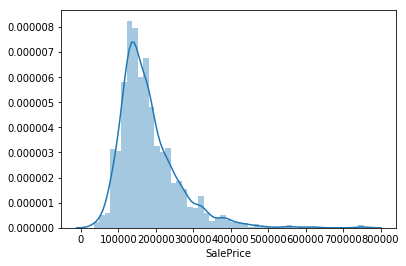

In [13]:
# data_train['SalePrice'].describe()
sns.distplot(data_train['SalePrice'])
# skewness and kurtosis
print(f"Skewness: {data_train['SalePrice'].skew()}")
print(f"Kurtosis: {data_train['SalePrice'].kurt()}")

### 3.2 其他属性
然后我们来看看可能决定*房价*的其他属性，数据集中给出的有79个，将这79个信息进行分类、概括，以便进行特征的选取。

首先将属性类型分类为三种：“building--0”、“space--1”、“location--2”。具体解释如下：
- building：比如房屋材料、造型等与房屋物理特性相关的特征（e.g. 'OverallQual'）
- space：即与房屋空间有关的特征，如面积(e.g. 'TotalBsmtSF')
- location：如地段、道路情况等(e.g. 'Neighborhood')

然后每种属性的数据类型分类两类：“数值型--0”和“类别型--1”

分类后的结果如下：

| 变量名        | 中文解释                 | 数据类型 | 分类     |
| ------------- | ------------------------ | -------- | -------- |
| MSSubClass    | 住宅类型                 | 1        | building |
| MSZoning      | 住宅所在分区类型         | 1        | location |
| LotFrontage   | 房子到街区的距离         | 0        | location |
| LotArea       | 面积                     | 0        | space    |
| Street        | 所在街道                 | 1        | location |
| Alley         | 所在小路                 | 1        | location |
| LotShape      | 户型不规则程度           | 1        | building |
| LandContour   | 平坦程度                 | 1        | building |
| Utilities     | 水电气供应               | 1        | building |
| LotConfig     | 位置（临街状态）         | 1        | location |
| LandSlope     | 倾斜程度                 | 1        | building |
| Neighborhood  | 邻接情况                 | 1        | location |
| Condition1    | 位置特征1（道路、铁路）  | 1        | location |
| Condition2    | 位置特征2（道路、铁路）  | 1        | location |
| BldgType      | 住宅类型（楼房类型）     | 1        | building |
| HouseStyle    | 风格                     | 1        | building |
| OverallQual   | 房屋的整体情况评级         | 1        | building |
| OverallCond   | 房屋的整体状况评级           | 1        | building |
| YearBuilt     | 建造年份                 | 1        | building |
| YearRemodAdd  | 重修年份                 | 1        | building |
| RoofStyle     | 屋顶类型                 | 1        | building |
| RoofMatl      | 屋顶材料                 | 1        | building |
| Exterior1st   | 外墙材料1                | 1        | building |
| Exterior2nd   | 外墙材料2                | 1        | building |
| MasVnrType    | 石材类型                 | 1        | building |
| MasVnrArea    | 石材面积                 | 0        | space    |
| ExterQual     | 外部材料质量评级         | 1        | building |
| ExterCond     | 外部材料现状评级         | 1        | building |
| Foundation    | 地基类型                 | 1        | building |
| BsmtQual      | 地基深度                 | 0        | space    |
| BsmtCond      | 地基现状评级             | 1        | building |
| BsmtExposure  | 地下室出口暴露情况       | 1        | building |
| BsmtFinType1  | 地下室第一次状况评级     | 1        | building |
| BsmtFinSF1    | 地下室第一次完工面积     | 0        | space    |
| BsmtFinType2  | 地下室第二次状况评级     | 1        | building |
| BsmtFinSF2    | 地下室第二次完工面积     | 0        | space    |
| BsmtUnfSF     | 地下室未完成面积         | 0        | space    |
| TotalBsmtSF   | 地下室总面积             | 0        | space    |
| Heating       | 供暖类型                 | 1        | building |
| HeatingQC     | 供热质量状况评级         | 1        | building |
| CentralAir    | 是否有中央空调           | 1        | building |
| Electrical    | 电力系统类型（熔断机制） | 1        | building |
| 1stFlrSF      | 一楼面积                 | 0        | space    |
| 2ndFlrSF      | 二楼面积                 | 0        | space    |
| LowQualFinSF  | 低质量完工面积           | 0        | space    |
| GrLivArea     | 地面以上面积             | 0        | space    |
| BsmtFullBath  | 地下室全浴室             | 0        | space    |
| BsmtHalfBath  | 地下室半浴室             | 0        | space    |
| FullBath      | 地面以上全浴室           | 0        | space    |
| HalfBath      | 地面以上半浴室           | 0        | space    |
| BedroomAbvGr  | 地面以上卧室             | 0        | space    |
| KitchenAbvGr  | 地面以上厨房             | 0        | space    |
| KitchenQual   | 厨房质量评级             | 1        | building |
| TotRmsAbvGrd  | 地面以上房间数           | 0        | space    |
| Functional    | 房屋功能完整程度         | 1        | building |
| Fireplaces    | 壁炉数量                 | 1        | building |
| FireplaceQu   | 壁炉质量评级             | 1        | building |
| GarageType    | 车库类型                 | 1        | building |
| GarageYrBlt   | 车库建造年份             | 1        | building |
| GarageFinish  | 车库装修是否完成         | 1        | building |
| GarageCars    | 车库容量                 | 0        | space    |
| GarageArea    | 车库面积                 | 0        | space    |
| GarageQual    | 车库质量评级             | 1        | building |
| GarageCond    | 车库现状评级             | 1        | building |
| PavedDrive    | 车道铺装类型             | 1        | building |
| WoodDeckSF    | 木质地板面积             | 0        | space    |
| OpenPorchSF   | 开放式门廊面积           | 0        | space    |
| EnclosedPorch | 封闭式门廊面积           | 0        | space    |
| 3SsnPorch     | 时令门廊面积             | 0        | space    |
| ScreenPorch   | 屏幕门廊面积             | 0        | space    |
| PoolArea      | 游泳池面积               | 0        | space    |
| PoolQC        | 游泳池质量评级           | 1        | building |
| Fence         | 栅栏质量评级             | 1        | building |
| MiscFeature   | 其他功能                 | 1        | building |
| MiscVal       | 该其他功能价值           | 1        | building |
| MoSold        | 卖出月份                 | 1        | building |
| YrSold        | 卖出年份                 | 1        | building |
| SaleType      | 交易类型                 | 1        | building |
| SaleCondition | 交易情况                 | 1        | building |

然后继续在这些特征中找一些认为比较重要的特征详细的看看。

#### 3.2.1 类别型属性

##### 3.2.1.1 CentralAir 中央空调

有中央空调的房子售价普遍要高一些

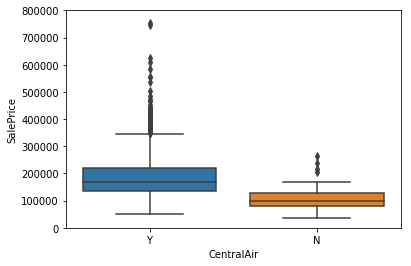

In [16]:
# CentralAir
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1) # 横向表的拼接
fig = sns.boxplot(x=var, y="SalePrice", data=data)  # 绘制箱型图
fig.axis(ymin=0, ymax=800000);

##### 3.2.1.2 OverallQual 总体评价
评分越高售价越高

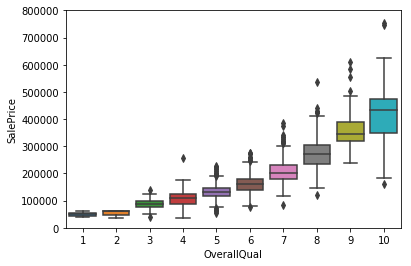

In [17]:
# OverallQual
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

##### 3.2.1.3 YearBuilt 建造年份
规律似乎不太明显，但是可以看出新建的房屋的售价会相对高一点，但是影响比较小。这一点散点图比箱型图表现的更加明显。

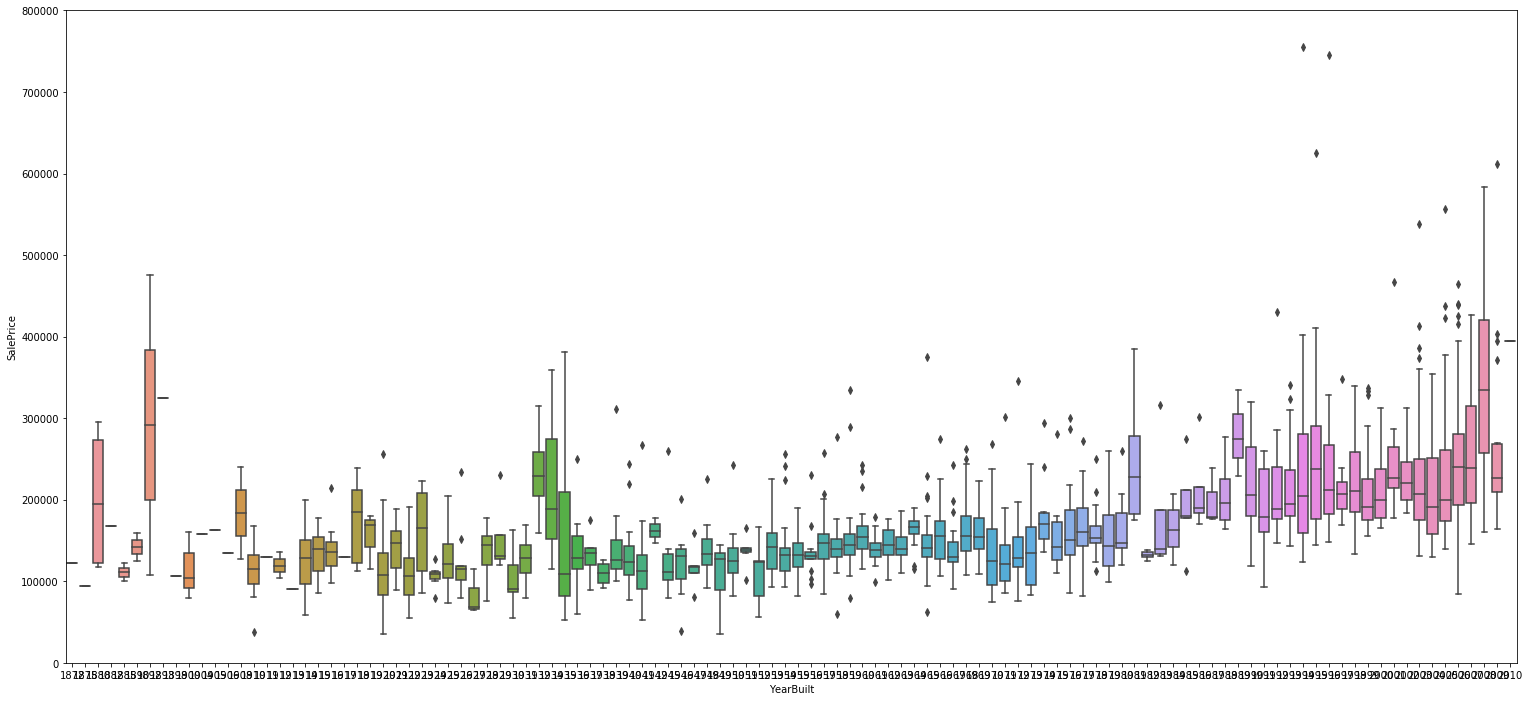

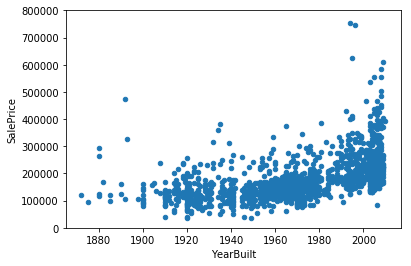

In [22]:
# YearBuilt boxplot
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12)) # 指定图片大小
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# YearBuilt  scatter
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

##### 3.2.1.4 Neighborhood 地段
在一些地段（如*NoRidge*、*NridgHt*、*StoneBr*）房屋i的售价偏高，而另一些地段（如*BrkSide*、*MeadowV*）房屋的售价偏低；可见可对地段做一个聚类，存在高价格地段、低价格地段的分类。

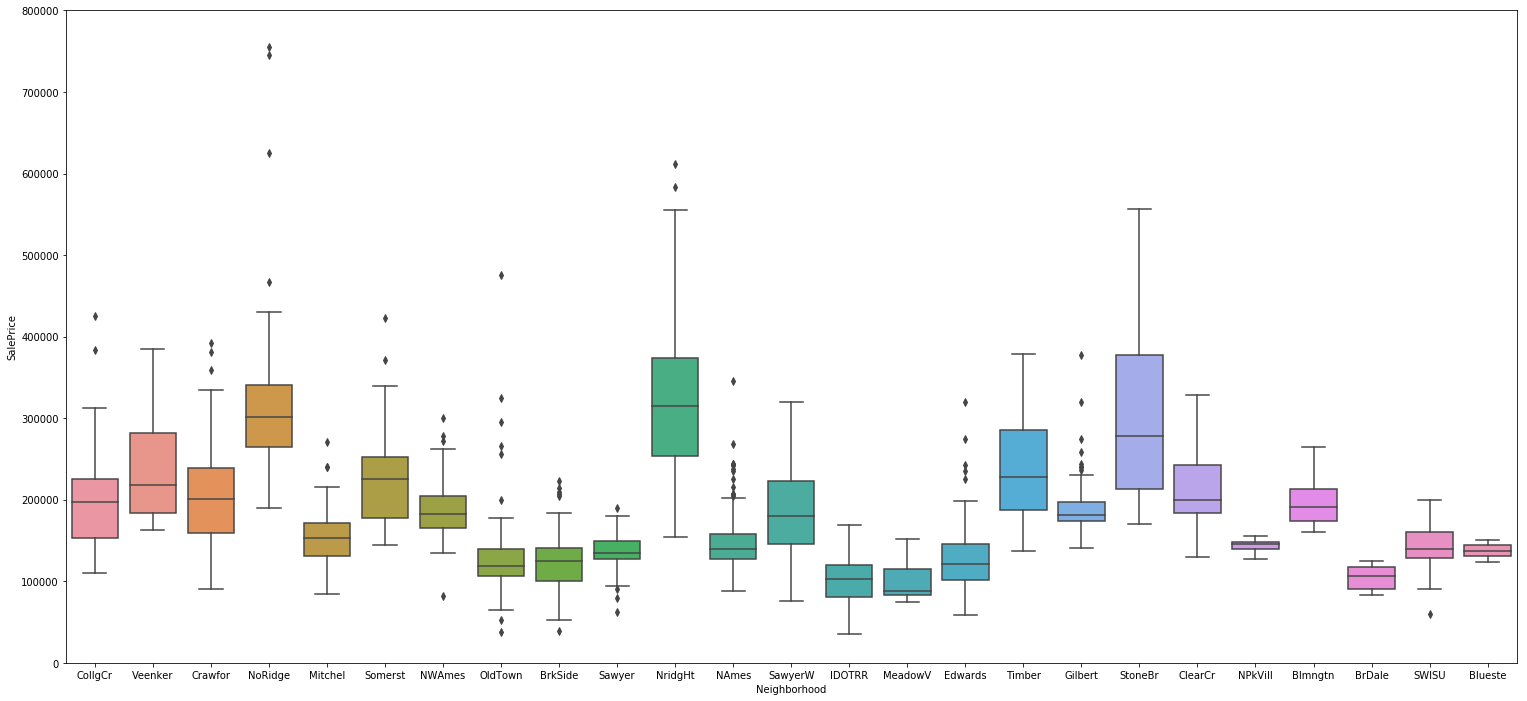

In [26]:
# Neighborhood  boxplot
var = 'Neighborhood'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


#### 3.2.2 数值型特征

##### 3.2.2.1 LotArea 面积
在相同面积条件下，一般对应的价格比较分散；似乎地表面积对于价格的影响不大。

所以不考虑将面积作为特征属性。

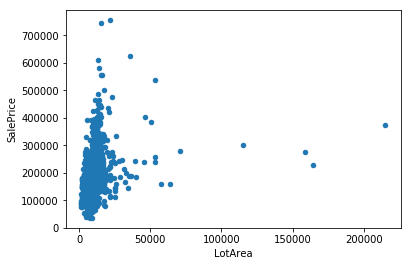

In [27]:
var ="LotArea"
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0.800000))

##### 3.2.2.2 GrLivArea 地表面积
地表面积的增加可能会导致房屋售价的增加，但是这种影响是不确定的，仍存在相当一部分数据，大地表面积的房屋和小地表面积的房屋售价相近。

但可以确认的是，地表面积影响了房屋售价的上限，房屋售价的上限大致与地表面积呈正比。

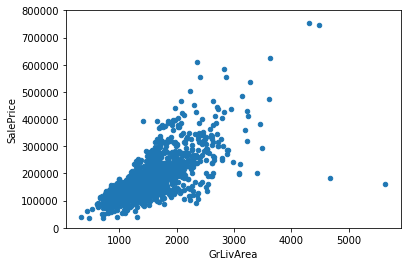

In [31]:
var ='GrLivArea'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.3 TotalBsmtSF 地下室总面积
地下室面积的增大会导致售价的升高，但这种影响不是一定的。

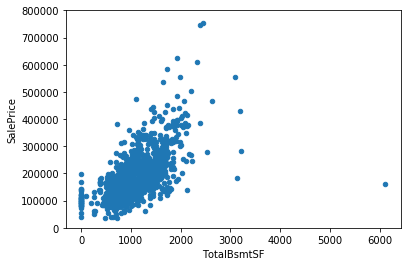

In [33]:
var ='TotalBsmtSF'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.4 MiscVal 其他功能价值 
其他功能价值的值不会对房屋价格产生太大影响。

所以不考虑将其他功能价值作为特征属性。

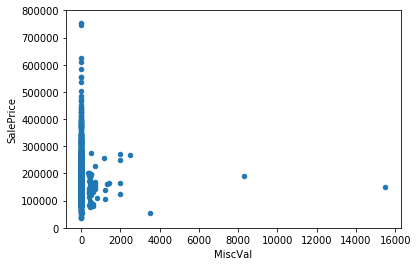

In [37]:
var='MiscVal'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.5  GarageArea 车库面积
车库面积的增大可能会导致售价增高

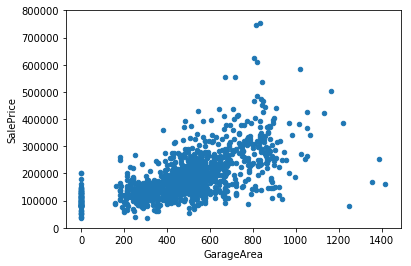

In [38]:
var='GarageArea'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.5  GarageCars 车库容量
车库容量的增大会导致房屋售价的上限增大。

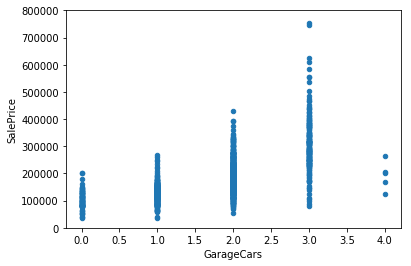

In [39]:
var='GarageCars'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

#### 3.2.3 更加详细的分析
上面选择了一些自己关心的矩阵进行分析，但是这是不全面和相当主观的，下面会用关系矩阵和关系点图进行进一步分析。

## 特征工程

## 模型选择

## 模型融合

## 修改特征和模型参数